In [23]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [24]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv(
    "Resources/lending_data.csv") 

# Review the DataFrame
lending_data_df.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
5,10100.0,7.438,50600,0.407115,4,1,20600,0
6,10300.0,7.490,51100,0.412916,4,1,21100,0
7,8800.0,6.857,45100,0.334812,3,0,15100,0
8,9300.0,7.096,47400,0.367089,3,0,17400,0
9,9700.0,7.248,48800,0.385246,4,0,18800,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [31]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df["loan_status"]

# Separate the X variable, the features
X = lending_data_df.drop(columns=['loan_status'])

In [32]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [50]:
# y contains the target variable 'loan_status'
loan_status_counts = y.value_counts()

# Display the counts
print(loan_status_counts)

loan_status
0    75036
1     2500
Name: count, dtype: int64


In [33]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [34]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [35]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [36]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [44]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
confusion_matrix(y_test, predictions)

Confusion Matrix


array([[18663,   102],
       [   56,   563]], dtype=int64)

In [48]:
# Print the classification report for the model
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs very well for the 'healthy loan' (0) with perfect precision and very high recall. The model also performs well for the 'high-risk loan' (1) with strong precision and recall. The high accuracy of 99% indicates that the model handles the data very well; however, there is a slight imbalance in performance between the 'healthy loan' and 'high-risk loan'. The model is slightly less accurate in predicting high-risk loans.

_____________________________________________________________________________________________________________________________

## Fitting the Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1)

In [52]:
# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Making Predictions Using the Tree Model

In [53]:
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

## Model Evaluation

In [57]:
# Generate a confusion matrix for the model
print("Confusion Matrix")
confusion_matrix(y_test, predictions)

Confusion Matrix


array([[18663,   102],
       [   56,   563]], dtype=int64)

In [54]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384



_______________________________________________________________________________________________________________________________

## Fitting the Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [71]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

## Making Predictions Using the Random Forest Model

In [72]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

## Model Evaluation

In [73]:
# Generate a confusion matrix for the model
print("Confusion Matrix")
confusion_matrix(y_test, predictions)

Confusion Matrix


array([[18665,   100],
       [   62,   557]], dtype=int64)

In [74]:
# Print the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384



## Feature Importance

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.27413748501404395, 'interest_rate'),
 (0.1745216750867508, 'borrower_income'),
 (0.1586829713356784, 'debt_to_income'),
 (0.1446078808054953, 'total_debt'),
 (0.12906679246518254, 'loan_size'),
 (0.11890253137659158, 'num_of_accounts'),
 (8.06639162573785e-05, 'derogatory_marks')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

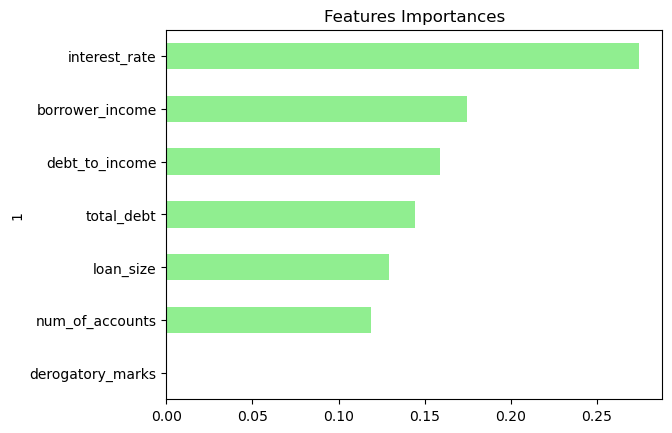

In [76]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

---